In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

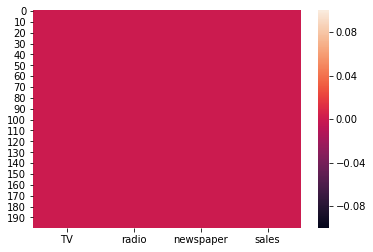

In [9]:
sns.heatmap(df.isnull())

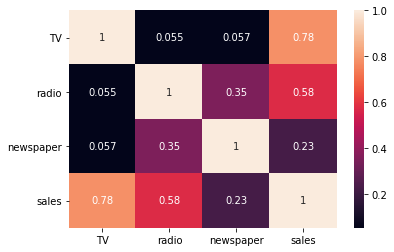

In [10]:
sns.heatmap(df.corr(),annot=True)

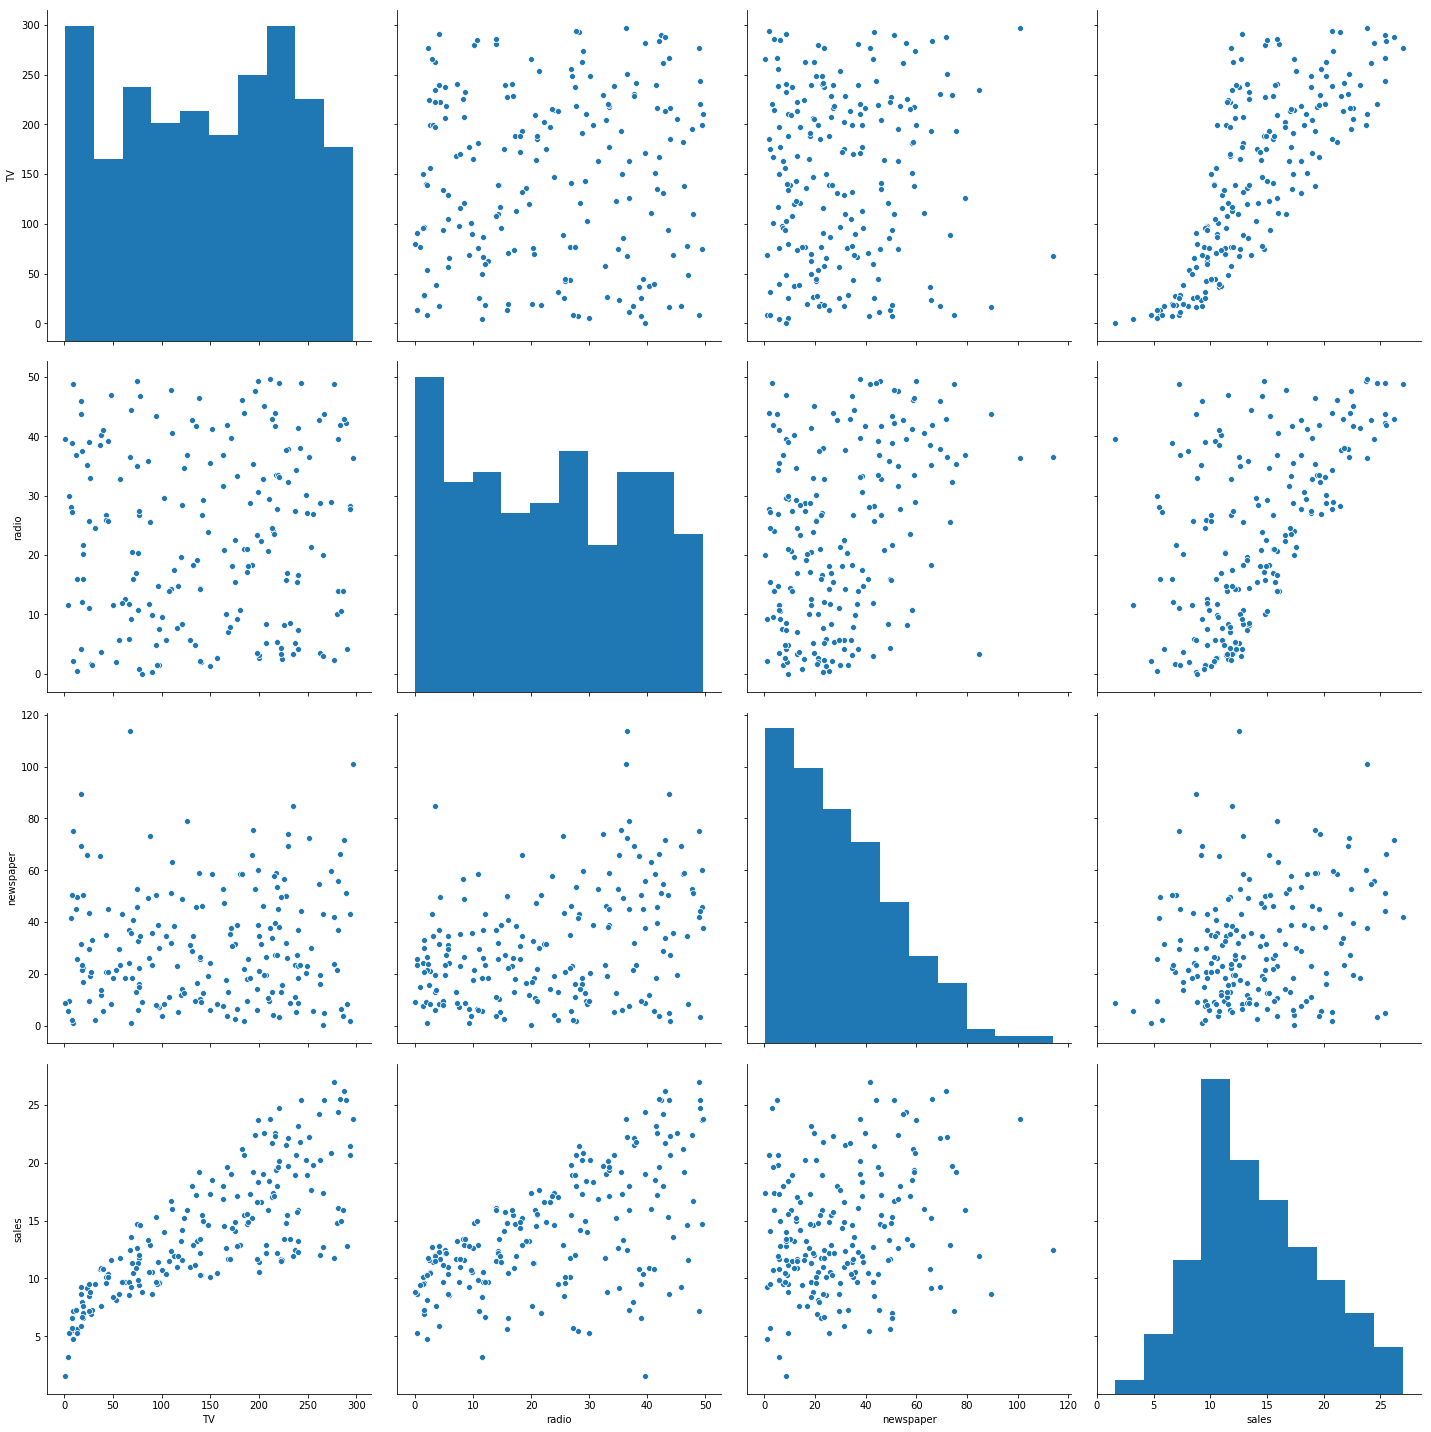

In [11]:
sns.pairplot(df,size=5)

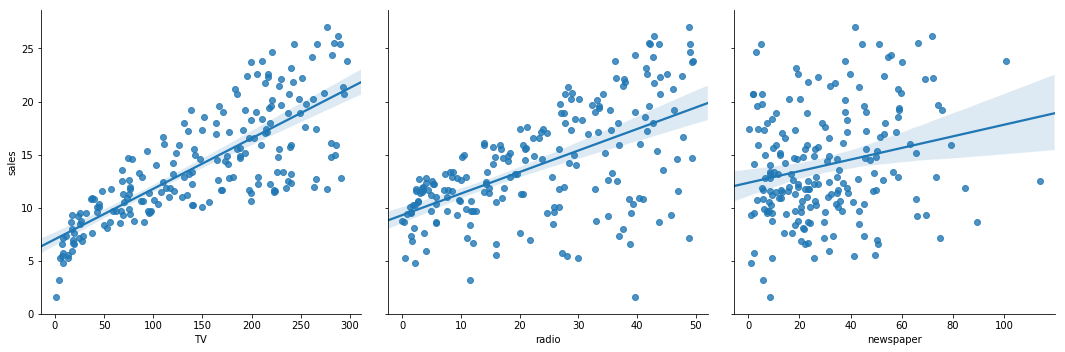

In [12]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, kind='reg')

If we increase the advertisement on tv the sales is also increases

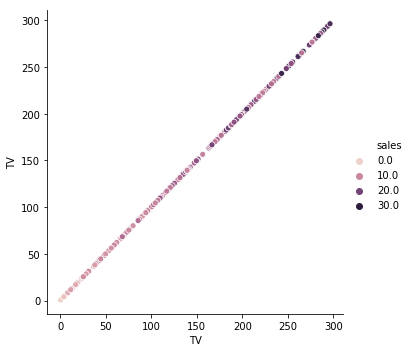

In [13]:
sns.relplot(x='TV',y='TV',hue='sales',data=df)

If we increase the advertisement on radio the sales is also increases

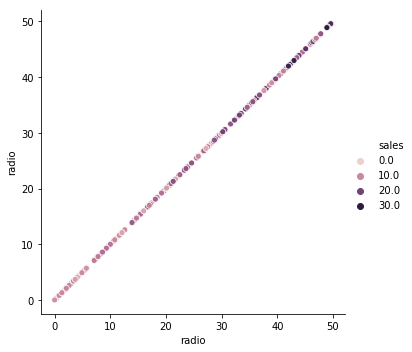

In [14]:
sns.relplot(x='radio',y='radio',hue='sales',data=df)

If we increase the advertisement on newspaper , It may not impact on sales after sometime or may be constant

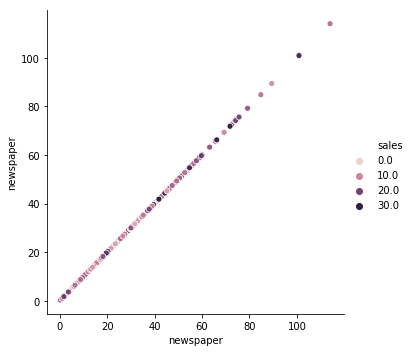

In [15]:
sns.relplot(x='newspaper',y='newspaper',hue='sales',data=df)

If we increase advertisment on tv and radio the sales are also increase

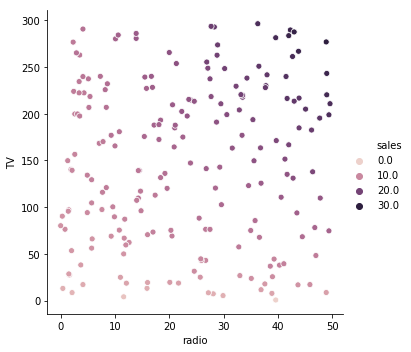

In [16]:
sns.relplot(x='radio',y='TV',hue='sales',data=df)

Newspaper cannot impact to much on sales

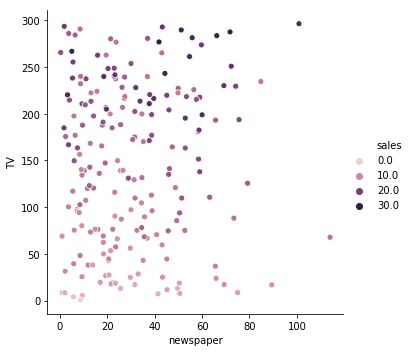

In [17]:
sns.relplot(x='newspaper',y='TV',hue='sales',data=df)

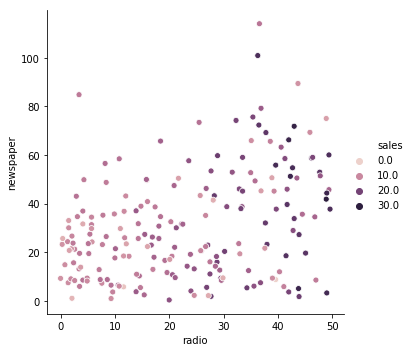

In [18]:
sns.relplot(x='radio',y='newspaper',hue='sales',data=df)

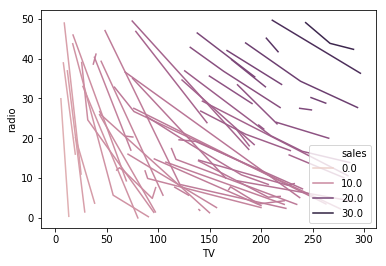

In [19]:
sns.lineplot(x='TV',y='radio',hue='sales',data=df)

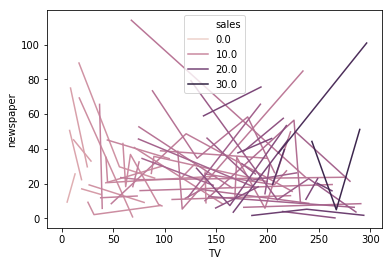

In [20]:
sns.lineplot(x='TV',y='newspaper',hue='sales',data=df)

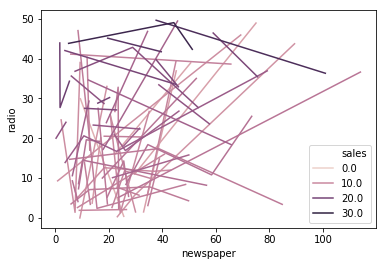

In [21]:
sns.lineplot(x='newspaper',y='radio',hue='sales',data=df)

In [22]:
import scipy
from scipy.stats import boxcox

In [23]:
df['newspaper']=boxcox(df['newspaper'],0)

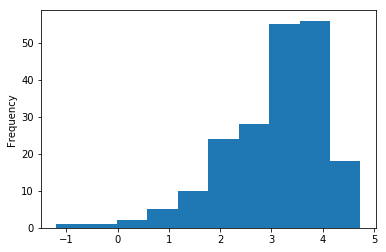

In [24]:
df['newspaper'].plot.hist()

In [25]:
x=df.iloc[:,:-2]
x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [26]:
y=df.iloc[:,-1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [27]:
import sklearn
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=60)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict

In [31]:
def model(a):
    ML=a
    ML.fit(x_train,y_train)
    pre=ML.predict(x_test)
    score=cross_val_score(a,x,y,cv=3)
    b=score.mean()
    pred=cross_val_predict(a,x,y,cv=3)
    c=r2_score(y,pred)
    return(print('Taining_score = ',ML.score(x_train,y_train),'\n\ncross_val_score = ',b,'\n\ncross_val_predict = ',c,'\n\nR2_score = ',r2_score(y_test,pre),'\n\nMAE = ',mean_absolute_error(y_test,pre),'\n\nMSE = ',mean_squared_error(y_test,pre),'\n\nRMSE = ',np.sqrt(mean_squared_error(y_test,pre))))


In [32]:
from sklearn.linear_model import LinearRegression
model(LinearRegression())

Taining_score =  0.8876588595745498 

cross_val_score =  0.8931635501481657 

cross_val_predict =  0.8937177145578354 

R2_score =  0.9222657646801459 

MAE =  1.2195842743389875 

MSE =  2.1865346897799243 

RMSE =  1.4786935753495125


In [33]:
from sklearn.linear_model import Lasso
model(Lasso())

Taining_score =  0.8165659694574787 

cross_val_score =  0.8213927849987165 

cross_val_predict =  0.8223486527183691 

R2_score =  0.8258875562625558 

MAE =  1.6803385294425142 

MSE =  4.897493319227923 

RMSE =  2.213028088214861


In [34]:
from sklearn.linear_model import Ridge
model(Ridge())

Taining_score =  0.8876242227085395 

cross_val_score =  0.8931474089049952 

cross_val_predict =  0.8937017149338947 

R2_score =  0.921543641301757 

MAE =  1.2236361825320434 

MSE =  2.2068468188007007 

RMSE =  1.4855459665727953


In [35]:
from sklearn.linear_model import ElasticNet
model(ElasticNet())

Taining_score =  0.7345080411407208 

cross_val_score =  0.7365827527335921 

cross_val_predict =  0.7378268032127334 

R2_score =  0.7348392963555239 

MAE =  2.130771015607186 

MSE =  7.458529366108245 

RMSE =  2.7310308248183954


In [36]:
from sklearn.tree import DecisionTreeRegressor
model(DecisionTreeRegressor())

Taining_score =  1.0 

cross_val_score =  0.9635431634633952 

cross_val_predict =  0.9560045309813581 

R2_score =  0.948471889698701 

MAE =  0.9060000000000001 

MSE =  1.4494000000000005 

RMSE =  1.2039102956615997


In [37]:
from sklearn.neighbors import KNeighborsRegressor
model(KNeighborsRegressor())

Taining_score =  0.982554687931266 

cross_val_score =  0.964809678827606 

cross_val_predict =  0.9652018416514776 

R2_score =  0.9583625565337387 

MAE =  0.6788000000000005 

MSE =  1.1711920000000011 

RMSE =  1.0822162445648287


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
model(GradientBoostingRegressor())

Taining_score =  0.9985092961908411 

cross_val_score =  0.9796155249964946 

cross_val_predict =  0.9797942962075314 

R2_score =  0.9833734683353326 

MAE =  0.5385782798326956 

MSE =  0.46767666917840606 

RMSE =  0.6838688976539334


In [39]:
from sklearn.ensemble import RandomForestRegressor
model(RandomForestRegressor())

Taining_score =  0.9943799504293255 

cross_val_score =  0.9709801098002487 

cross_val_predict =  0.9762682905836765 

R2_score =  0.9682999378278189 

MAE =  0.7053999999999999 

MSE =  0.8916699999999996 

RMSE =  0.9442827966239773


In [40]:
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('Ridge',Ridge()))
models.append(('ElasticNet',ElasticNet()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('KNeighborsRegressor',KNeighborsRegressor()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))

In [41]:
from sklearn.model_selection import KFold,cross_val_score

In [42]:
ModelName = []
MSE = []
R2score =[]
cvs=[]
MAE = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MSE.append(mean_squared_error(y_test, y_pred))
    R2score.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test,y_pred))
    kfold = KFold(n_splits=10, random_state=10) 
    re = cross_val_score(model, x, y, cv=kfold, scoring='r2').mean()
    cvs.append(re)
    ModelName.append(name)
result = pd.DataFrame({'Model_name': ModelName, 'Mean_squared_error': MSE ,'R2_score': R2score,'Mean_absolute_error': MAE,'Cross_val_score':cvs})
result

,Model_name,Mean_squared_error,R2_score,Mean_absolute_error,Cross_val_score
0,LinearRegression,2.186535,0.922266,1.219584,0.886967
1,Lasso,4.897493,0.825888,1.680339,0.814858
2,Ridge,2.206847,0.921544,1.223636,0.887053
3,ElasticNet,7.458529,0.734839,2.130771,0.730104
4,DecisionTreeRegressor,1.258600,0.955255,0.862000,0.966156
5,KNeighborsRegressor,1.171192,0.958363,0.678800,0.974265
6,GradientBoostingRegressor,0.466052,0.983431,0.535635,0.982704
7,RandomForestRegressor,0.608694,0.978360,0.579800,0.977516


I choose GradientBoostingRegressor as my final model because it has lowest Mean_squared_error and good R2_score

Mean_squared_error = 0.467055

R2_score = 0.983396